In [1]:
pip install joblib

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv(r"F:\4th sem\internship\Technocolab 4th sem internship\cleaned data.csv")

In [10]:
df = pd.DataFrame(df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108945 entries, 0 to 108944
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   SYMBOL  108945 non-null  object 
 1   DATE    108945 non-null  object 
 2   OPEN    108945 non-null  float64
 3   HIGH    108945 non-null  float64
 4   LOW     108945 non-null  float64
 5   CLOSE   108945 non-null  float64
 6   VOLUME  108945 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ MB


In [12]:
df.drop('SYMBOL', axis = 1 , inplace = True)

In [13]:
df.drop('DATE', axis = 1 , inplace = True)

In [14]:
df

,OPEN,HIGH,LOW,CLOSE,VOLUME
0,48.599998,48.930000,48.470001,48.910000,906700
1,48.680000,48.810001,48.419998,48.660000,1001200
2,48.990002,49.480000,48.830002,49.400002,868600
3,49.040001,49.279999,49.020000,49.090000,868900
4,49.750000,49.910000,49.560001,49.779999,1733550
...,...,...,...,...,...
108940,15.300000,15.300000,13.760000,13.870000,65500
108941,13.500000,14.000000,13.310000,13.640000,39500
108942,13.620000,14.920000,13.530000,14.720000,50700
108943,14.590000,16.160000,14.470000,14.960000,74000


In [15]:
df.isnull().sum()

OPEN      0
HIGH      0
LOW       0
CLOSE     0
VOLUME    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108945 entries, 0 to 108944
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   OPEN    108945 non-null  float64
 1   HIGH    108945 non-null  float64
 2   LOW     108945 non-null  float64
 3   CLOSE   108945 non-null  float64
 4   VOLUME  108945 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 4.2 MB


In [17]:
#for standardizing features, we ll use the standardScaler module
from sklearn.preprocessing import StandardScaler
#sk learn is one of the most widly used lib for ml we,ll use it for kmeans and pca module
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [18]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
segmentation_std = ms.fit_transform(df)

In [19]:
segmentation_std 

array([[0.50671408, 0.49579788, 0.52090944, 0.51014247, 0.52303077],
       [0.50756131, 0.49456046, 0.52036418, 0.50749431, 0.57754319],
       [0.51084425, 0.50146944, 0.52483508, 0.51533289, 0.50105275],
       ...,
       [0.13627314, 0.14508894, 0.13990512, 0.14797945, 0.02924634],
       [0.14654552, 0.15787574, 0.15015539, 0.15052169, 0.04268697],
       [0.14876943, 0.14797628, 0.1451393 , 0.1477676 , 0.02076663]])

In [20]:
#PCA
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [21]:
#the attribute shows how much variance is explained by each of the 5 individual components
pca.explained_variance_ratio_

array([8.04110237e-01, 1.95469468e-01, 1.99943683e-04, 1.90489499e-04,
       2.98617690e-05])

Text(0, 0.5, 'cumulative Explained Variance')

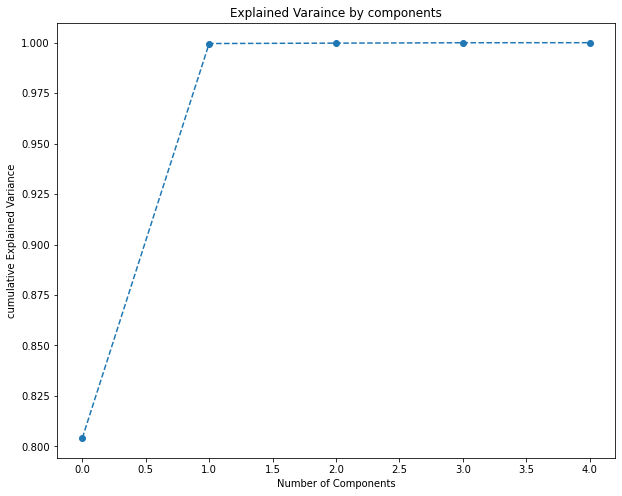

In [22]:
plt.figure(figsize = (10,8))
plt.plot(range(0,5),pca.explained_variance_ratio_.cumsum(),marker ='o',linestyle ='--')
plt.title ('Explained Varaince by components')
plt.xlabel('Number of Components')
plt.ylabel('cumulative Explained Variance')

In [23]:
pca = PCA(n_components = 3)

In [24]:
pca.fit(segmentation_std )

PCA(n_components=3)

In [25]:
pca.transform(segmentation_std )

array([[ 0.30596696,  0.18765292, -0.01018028],
       [ 0.30879515,  0.24211916, -0.01241522],
       [ 0.31353035,  0.16495652, -0.00873476],
       ...,
       [-0.46538082, -0.24235234,  0.00881584],
       [-0.44638396, -0.23047463,  0.00630252],
       [-0.4559306 , -0.25167259,  0.00105369]])

In [26]:
scores_pca = pca.transform(segmentation_std )

In [27]:
wcss = []
for i in range(1, 10):
    kmeans_pca = KMeans(n_clusters=i ,init = 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

In [28]:
#Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

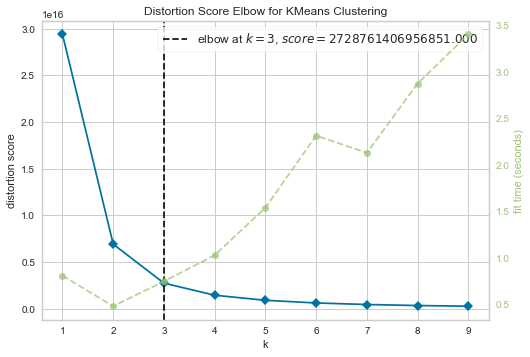

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,10),random_state = 42, timings= True)
visualizer.fit(df)        # Fit data to visualizer
visualizer.show()

Text(0.5, 1.0, 'K-MEANS WITH PCA')

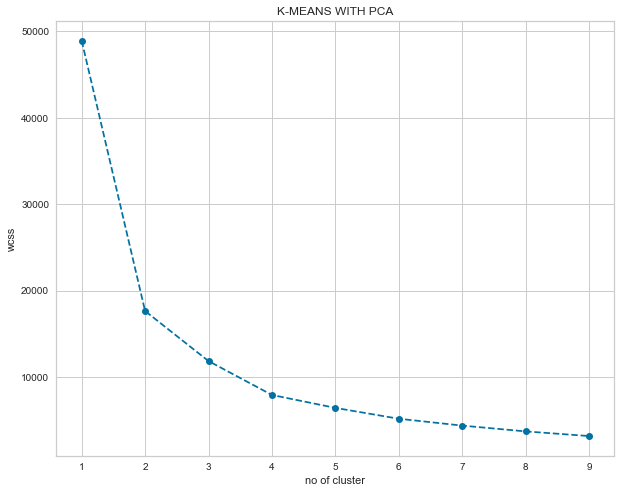

In [30]:
plt.figure(figsize = (10,8))
plt.plot(range(1,10), wcss, marker ='o' , linestyle ='--')
plt.xlabel('no of cluster')
plt.ylabel('wcss')
plt.title ('K-MEANS WITH PCA')




In [31]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++',random_state=42) 

In [32]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [33]:
df_seg_pca_kmeans = pd.concat([df.reset_index(drop = True),pd.DataFrame(scores_pca)], axis =1)
df_seg_pca_kmeans.columns.values[-3: ] =['component 1','component 2','component 3']

df_seg_pca_kmeans['Segment k-means PCA'] = kmeans_pca.labels_

In [34]:
df_seg_pca_kmeans.head(50)

,OPEN,HIGH,LOW,CLOSE,VOLUME,component 1,component 2,component 3,Segment k-means PCA
0,48.599998,48.930000,48.470001,48.910000,906700,0.305967,0.187653,-0.010180,2
1,48.680000,48.810001,48.419998,48.660000,1001200,0.308795,0.242119,-0.012415,2
2,48.990002,49.480000,48.830002,49.400002,868600,0.313530,0.164957,-0.008735,2
3,49.040001,49.279999,49.020000,49.090000,868900,0.312182,0.165237,-0.012630,2
4,49.750000,49.910000,49.560001,49.779999,1733550,0.367946,0.661071,-0.013378,2
5,49.810001,50.369999,49.639999,50.349998,1733550,0.374065,0.660559,-0.008744,2
6,49.970001,50.540001,49.610001,50.320000,1733550,0.375459,0.660443,-0.008775,2
7,49.840000,50.009998,49.549999,49.700001,1063800,0.335764,0.276069,-0.013048,2
8,49.759998,49.820000,49.400002,49.660000,757900,0.318407,0.100449,-0.012731,0
9,49.820000,49.889999,49.639999,49.779999,660100,0.316248,0.044011,-0.013179,0


In [35]:
df_seg_pca_kmeans['Segment'] =df_seg_pca_kmeans['Segment k-means PCA'].map({0:'first',1:'second',2:'third'}) 

In [36]:
import seaborn as sns
sns.set()

C:\Users\pushk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


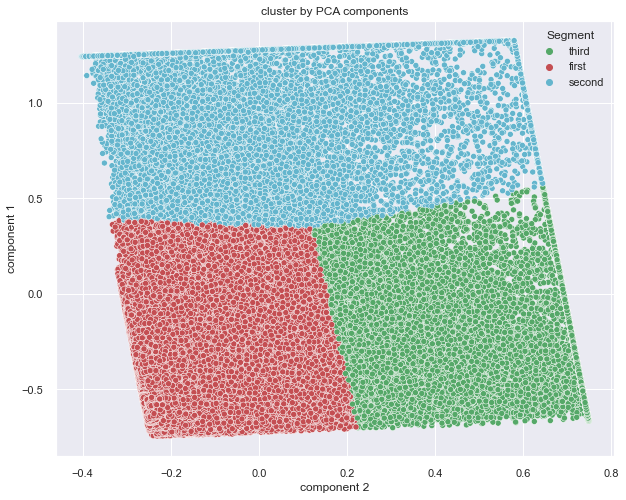

In [37]:
x_axis = df_seg_pca_kmeans['component 2']
y_axis = df_seg_pca_kmeans['component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis ,y_axis ,hue =df_seg_pca_kmeans['Segment'], palette =['g','r','c'] )
plt.title('cluster by PCA components')
plt.show()

### LOGISTIC REGRESSION

#### 1.Import required libraries

In [38]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from matplotlib import pyplot as plt

import seaborn as sns

#### 2. exploring the data

In [39]:
df_seg_pca_kmeans 

,OPEN,HIGH,LOW,CLOSE,VOLUME,component 1,component 2,component 3,Segment k-means PCA,Segment
0,48.599998,48.930000,48.470001,48.910000,906700,0.305967,0.187653,-0.010180,2,third
1,48.680000,48.810001,48.419998,48.660000,1001200,0.308795,0.242119,-0.012415,2,third
2,48.990002,49.480000,48.830002,49.400002,868600,0.313530,0.164957,-0.008735,2,third
3,49.040001,49.279999,49.020000,49.090000,868900,0.312182,0.165237,-0.012630,2,third
4,49.750000,49.910000,49.560001,49.779999,1733550,0.367946,0.661071,-0.013378,2,third
...,...,...,...,...,...,...,...,...,...,...
108940,15.300000,15.300000,13.760000,13.870000,65500,-0.457081,-0.234495,-0.004385,0,first
108941,13.500000,14.000000,13.310000,13.640000,39500,-0.478175,-0.247764,0.000170,0,first
108942,13.620000,14.920000,13.530000,14.720000,50700,-0.465381,-0.242352,0.008816,0,first
108943,14.590000,16.160000,14.470000,14.960000,74000,-0.446384,-0.230475,0.006303,0,first


In [42]:
dataset =df_seg_pca_kmeans 

In [43]:
dataset.drop('component 1', axis=1, inplace=True)
dataset.drop('component 2', axis=1, inplace=True)
dataset.drop('component 3', axis=1, inplace=True)
dataset.drop('Segment', axis=1, inplace=True)

In [54]:
dataset.rename(columns = {"OPEN":"OPEN","HIGH":"HIGH","LOW":"LOW","CLOSE":"CLOSE","VOLUME":"VOLUME","Segment k-means PCA":"cluster"},inplace = True)

In [55]:
dataset

,OPEN,HIGH,LOW,CLOSE,VOLUME,cluster
0,48.599998,48.930000,48.470001,48.910000,906700,2
1,48.680000,48.810001,48.419998,48.660000,1001200,2
2,48.990002,49.480000,48.830002,49.400002,868600,2
3,49.040001,49.279999,49.020000,49.090000,868900,2
4,49.750000,49.910000,49.560001,49.779999,1733550,2
...,...,...,...,...,...,...
108940,15.300000,15.300000,13.760000,13.870000,65500,0
108941,13.500000,14.000000,13.310000,13.640000,39500,0
108942,13.620000,14.920000,13.530000,14.720000,50700,0
108943,14.590000,16.160000,14.470000,14.960000,74000,0


#### 3. Preprocessing the Dataset

In [56]:
X = dataset.iloc[:,dataset.columns != 'cluster']
y = dataset.cluster

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

In [61]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

#### 4. Exploratory Data Visualization

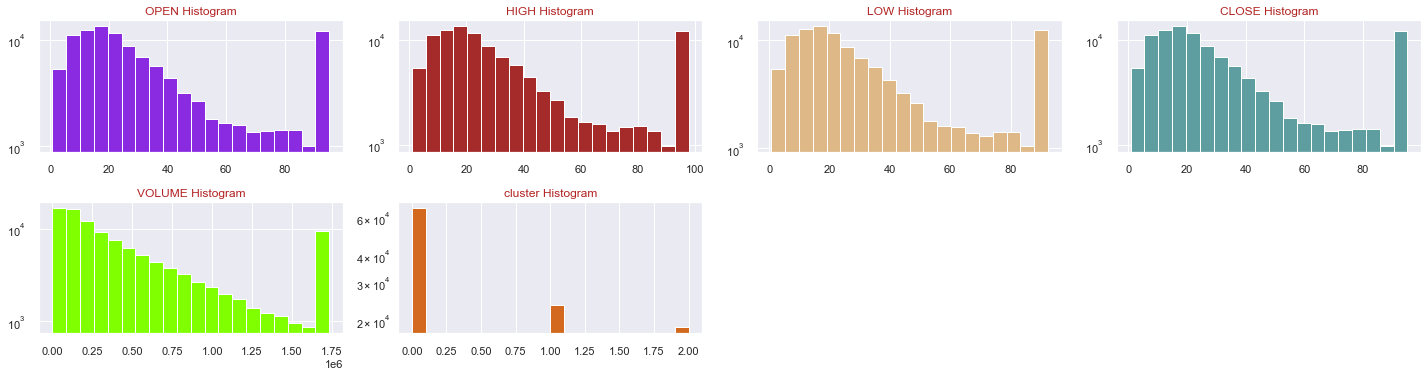

In [62]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(dataset,dataset.columns,8,4)

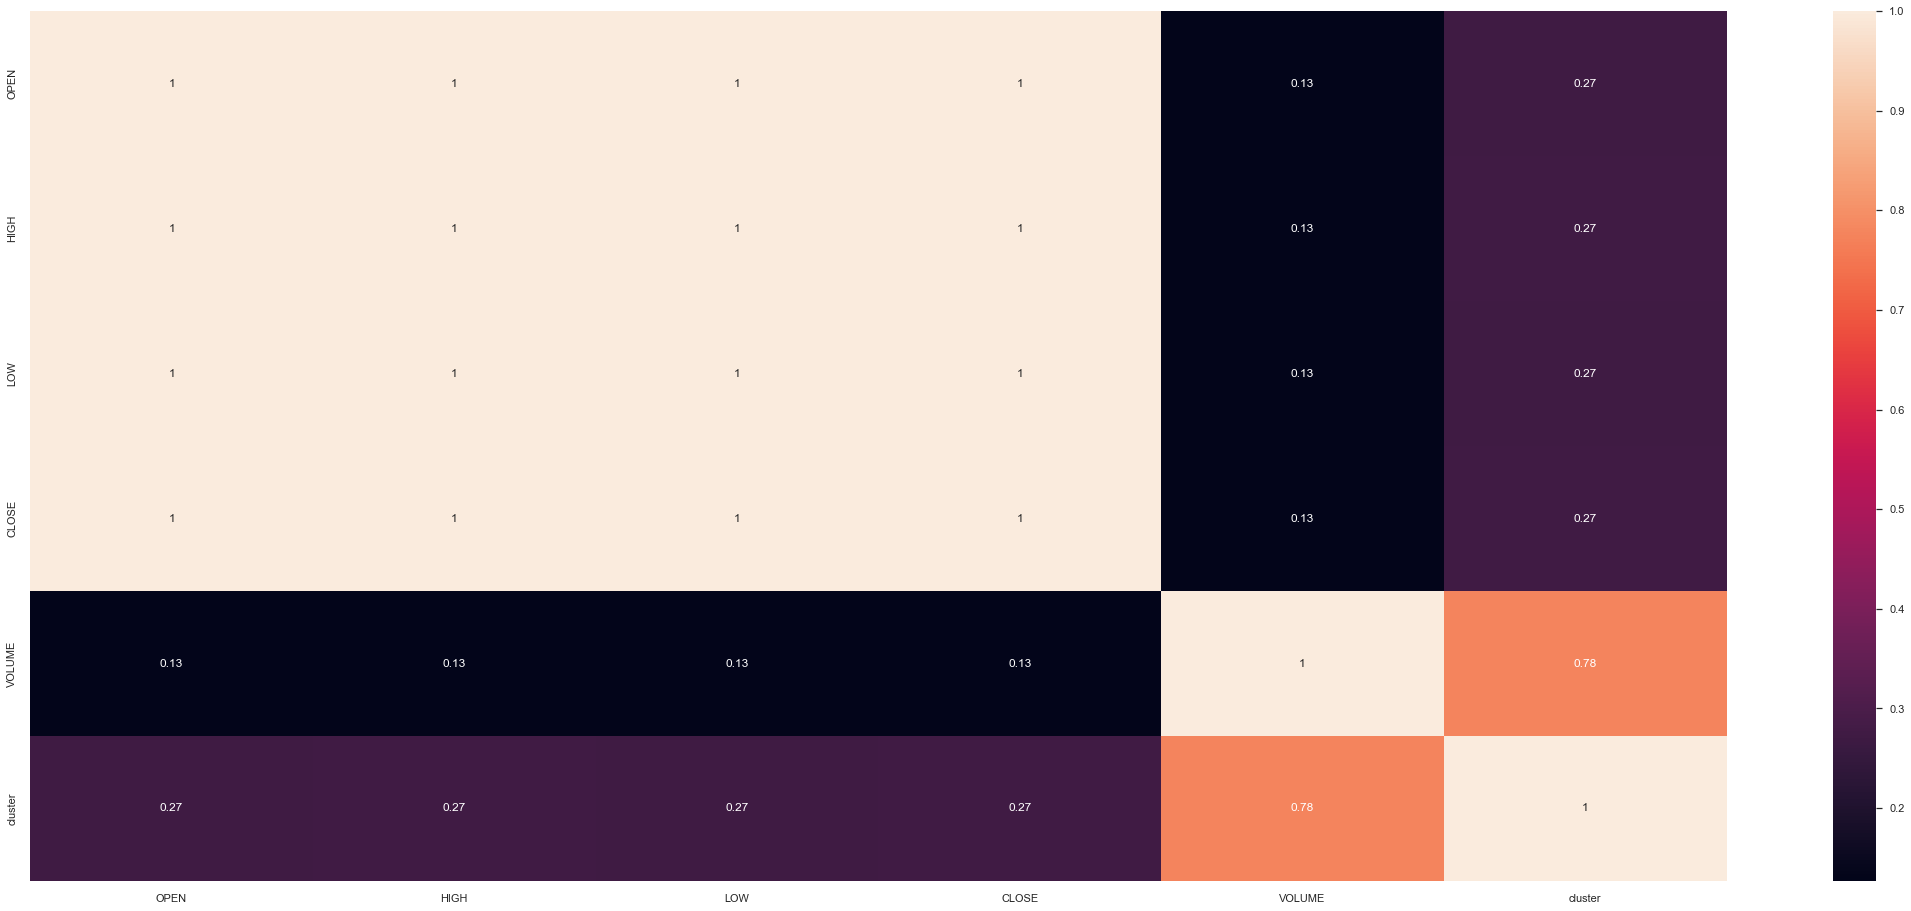

In [63]:
plt.figure(figsize = (38,16))
sns.heatmap(dataset.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

### Model Building and Training

#### 1 – Building the Logistic Regression Model

In [64]:
model = LogisticRegression()

In [65]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

### Evaluating the model

#### 1 – Evaluating on Training Set

In [66]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 99.85313690394236


In [71]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

#### 2 – Evaluating on Test Set

In [72]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 99.77970535591353


#### 3 – Generating Classification Report

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13334
           1       1.00      0.99      1.00      4710
           2       1.00      1.00      1.00      3745

    accuracy                           1.00     21789
   macro avg       1.00      1.00      1.00     21789
weighted avg       1.00      1.00      1.00     21789



#### 4 – Visualizing using Confusion Matrix

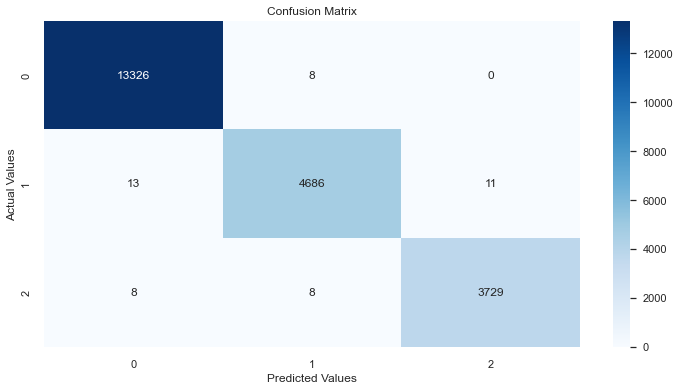

In [74]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [2]:
filename = "finalised_model.sav"
joblib.dump(cls,filename)

NameError: name 'cls' is not defined

### NAIVE BAYES

####  Importing the libraries

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

#### Splitting the dataset into the Training set and Test set

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#### Feature Scaling

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Training the Naive Bayes model on the Training set

In [79]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

#### Predicting the Test set results

In [80]:
y_pred  =  classifier.predict(X_test)


In [81]:
y_pred 

array([1, 0, 0, ..., 0, 1, 1])

In [82]:
y_test

2319     1
55743    0
24152    0
27679    2
29448    2
        ..
29745    2
38116    0
51451    0
4931     1
38640    1
Name: cluster, Length: 21789, dtype: int32

#### Making the Confusion Matrix

In [84]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [86]:
cm

array([[13105,    94,   137],
       [    0,  4701,     0],
       [    5,    47,  3700]], dtype=int64)

In [87]:
ac

0.9870117949424021

In [89]:
ac

0.9870117949424021

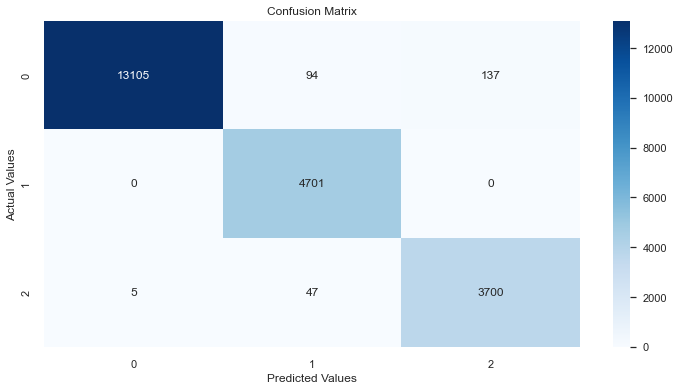

In [90]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')